In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Memuat data dari sheet Training
df = pd.read_excel('data.xlsx', sheet_name='Training')


In [26]:
# Cek dimensi dataset
print("Total Row Data:", df.shape[0])
print("Total Column Features:", df.shape[1])

Total Row Data: 450
Total Column Features: 18


In [28]:
# Informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      450 non-null    int64 
 1   HURUF   426 non-null    object
 2   Z1      450 non-null    int64 
 3   Z2      450 non-null    int64 
 4   Z3      450 non-null    int64 
 5   Z4      450 non-null    int64 
 6   Z5      450 non-null    int64 
 7   Z6      450 non-null    int64 
 8   Z7      450 non-null    int64 
 9   Z8      450 non-null    int64 
 10  Z9      450 non-null    int64 
 11  Z10     450 non-null    int64 
 12  Z11     450 non-null    int64 
 13  Z12     450 non-null    int64 
 14  Z13     450 non-null    int64 
 15  Z14     450 non-null    int64 
 16  Z15     450 non-null    int64 
 17  Z16     450 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 63.4+ KB
None


# Inconsistencies Analysis

### Missing Value

In [32]:
df.isna().sum()

No        0
HURUF    24
Z1        0
Z2        0
Z3        0
Z4        0
Z5        0
Z6        0
Z7        0
Z8        0
Z9        0
Z10       0
Z11       0
Z12       0
Z13       0
Z14       0
Z15       0
Z16       0
dtype: int64

In [31]:
# Display rows that have missing values
df[df.isna().any(axis=1)]

,No,HURUF,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
23,2,NaN,233,50,172,148,127,231,139,127,130,151,264,151,125,129,168,127
24,2,NaN,86,50,68,71,48,99,143,68,41,74,78,126,41,59,102,103
25,2,NaN,260,263,151,301,188,179,218,191,179,219,387,354,164,157,205,257
26,2,NaN,105,87,71,110,79,88,103,87,70,121,186,88,59,65,0,87
27,2,NaN,199,104,88,220,119,296,327,202,128,105,239,196,110,108,133,95
28,2,NaN,75,76,158,212,91,181,247,112,77,89,153,87,87,35,14,31
29,2,NaN,57,107,35,96,58,95,97,71,50,63,109,64,61,47,106,51
30,2,NaN,187,90,97,198,126,132,120,118,140,203,197,171,140,134,82,200
31,2,NaN,330,103,196,252,173,155,139,155,185,243,304,159,99,119,314,44
32,2,NaN,202,8,166,346,300,258,312,234,346,183,427,367,342,25,316,197


### Duplication

In [33]:
df.duplicated().sum()

1

In [34]:
# Display duplicated rows (excluding first occurrences)
df[df.duplicated()]

# If you want to see all rows that are duplicated (including first occurrences)
duplicate_rows = df.duplicated(keep=False)
print(f"Number of duplicated rows: {duplicate_rows.sum()}")
if duplicate_rows.sum() > 0:
    print("\nAll duplicated rows (including first occurrences):")
    display(df[duplicate_rows])

Number of duplicated rows: 2

All duplicated rows (including first occurrences):


,No,HURUF,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
396,18,BA,204,55,306,297,242,0,88,250,217,0,60,225,155,102,9,88
405,18,BA,204,55,306,297,242,0,88,250,217,0,60,225,155,102,9,88


### outliers analysis 

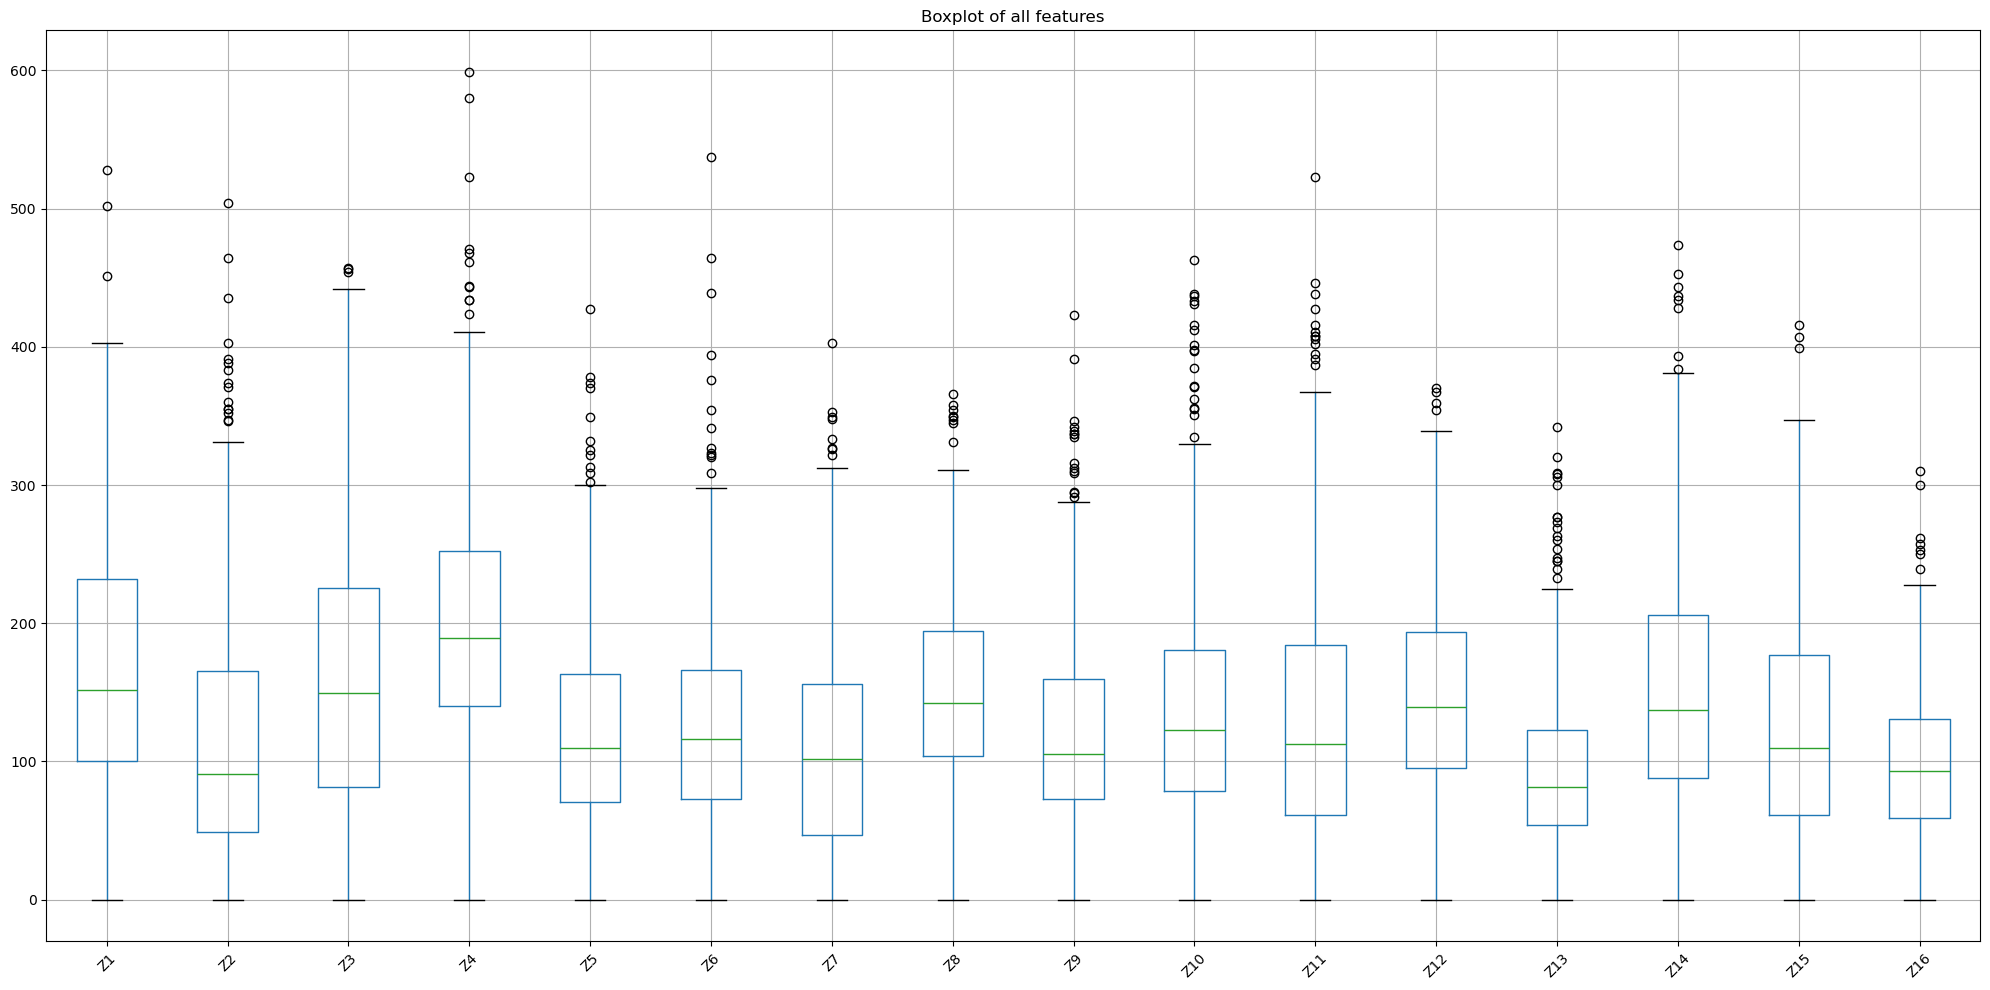

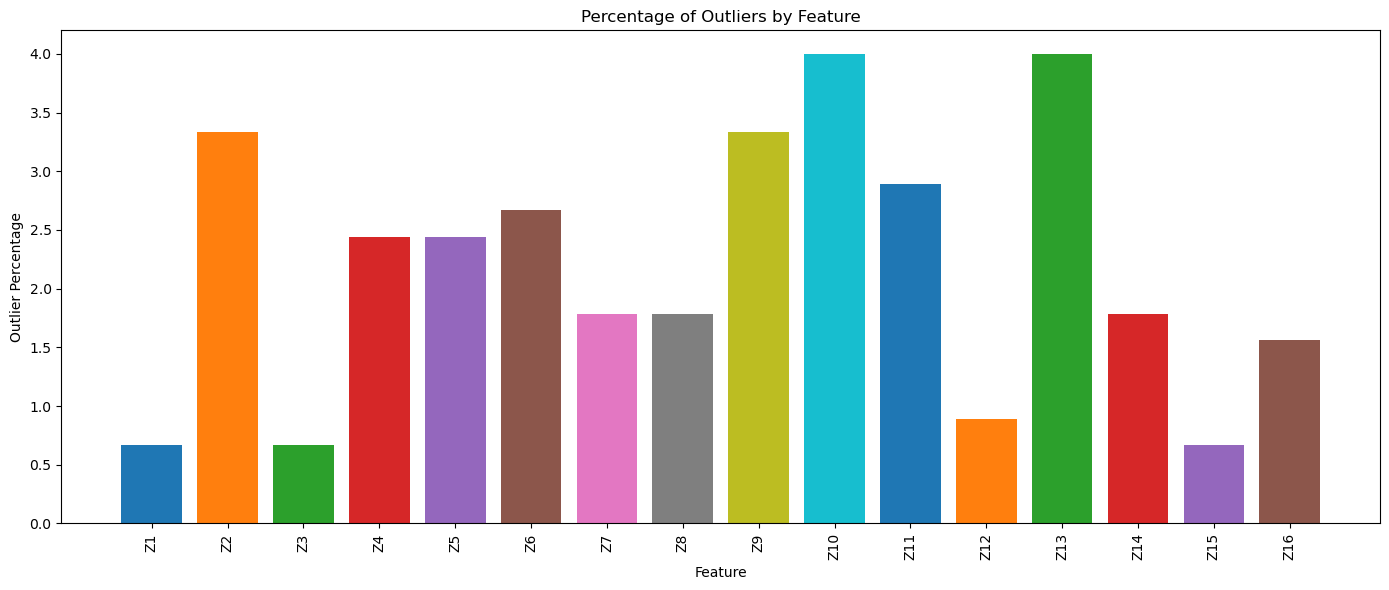

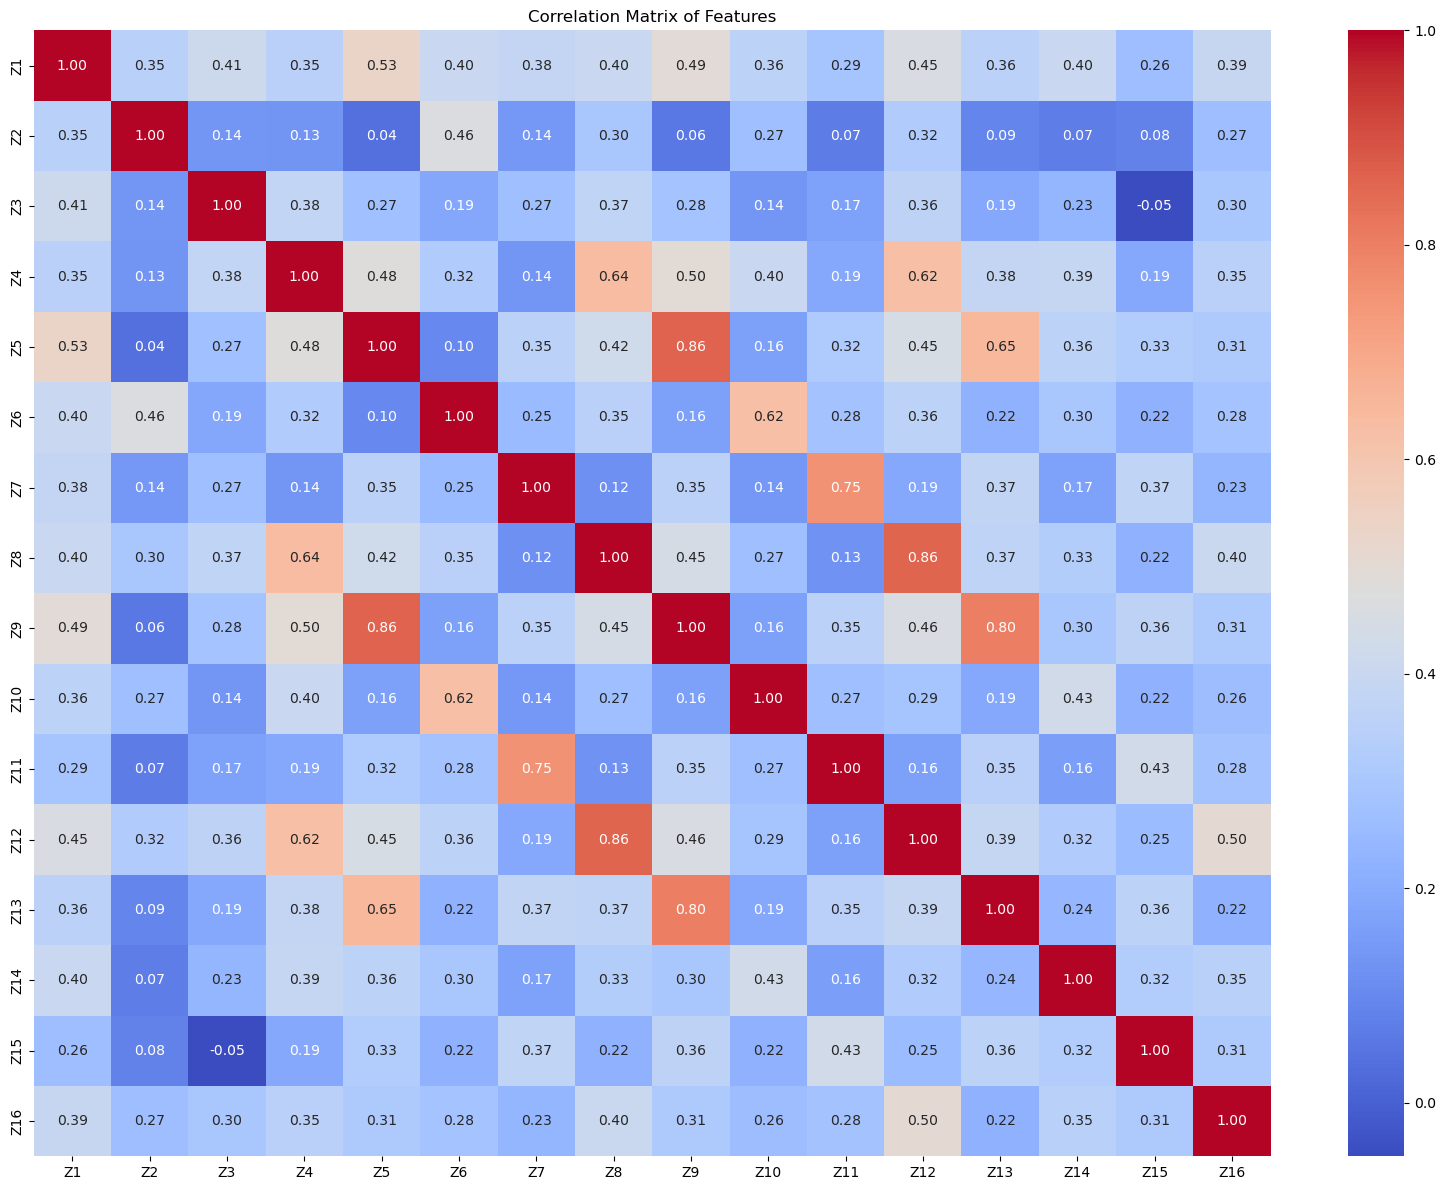

In [39]:
plt.figure(figsize=(20, 10))
features = [col for col in df.columns if col.startswith('Z')]
df[features].boxplot()
plt.title('Boxplot of all features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# IQR method to identify outliers
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Count outliers per feature
outlier_summary = {}
for feature in features:
    _, lower, upper, count = identify_outliers_iqr(df, feature)
    outlier_summary[feature] = {
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Count': count,
        'Percentage': round(count/len(df)*100, 2)
    }

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index')

# Visualize outlier percentage
plt.figure(figsize=(14, 6))
plt.bar(outlier_df.index, outlier_df['Percentage'], color=colors[:len(features)])
plt.title('Percentage of Outliers by Feature')
plt.xlabel('Feature')
plt.ylabel('Outlier Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correlation matrix to identify related features
plt.figure(figsize=(16, 12))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

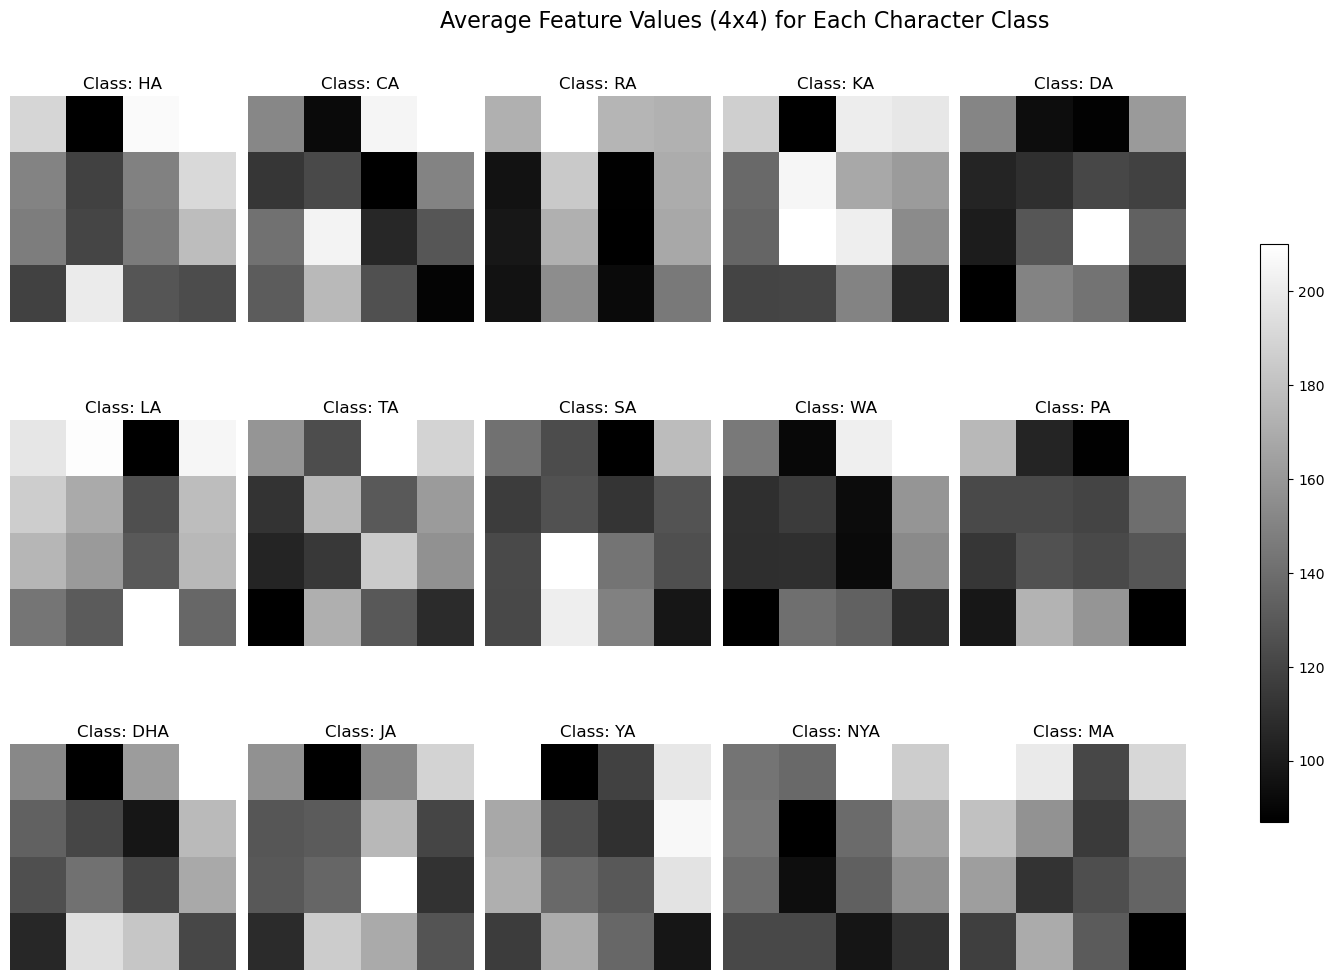

In [ ]:
T

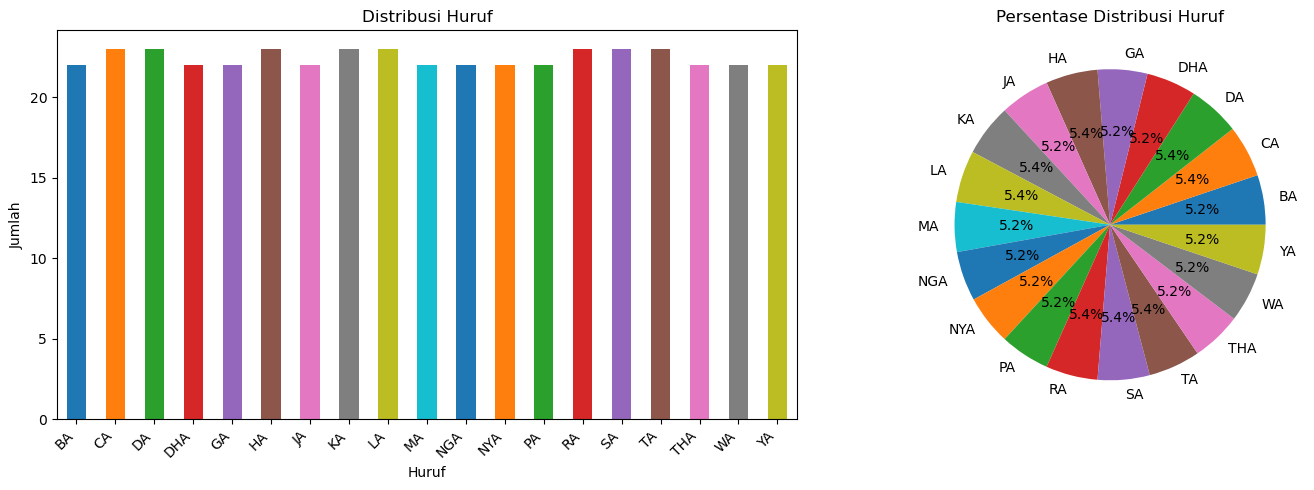

In [17]:
def class_distribution_plot(df):
    plt.figure(figsize=(15, 5))
    
    # Get unique classes
    classes = df['HURUF'].unique()
    
    # Bar Plot
    plt.subplot(1, 2, 1)
    label_counts = df['HURUF'].value_counts().sort_index()
    label_counts.plot(kind='bar', color=colors[:len(label_counts)])
    plt.title('Distribusi Huruf')
    plt.xlabel('Huruf')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
    plt.title('Persentase Distribusi Huruf')
    
    plt.tight_layout()
    plt.show()

class_distribution_plot(df)

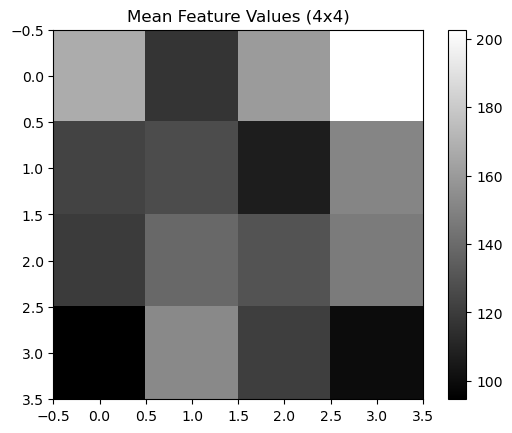

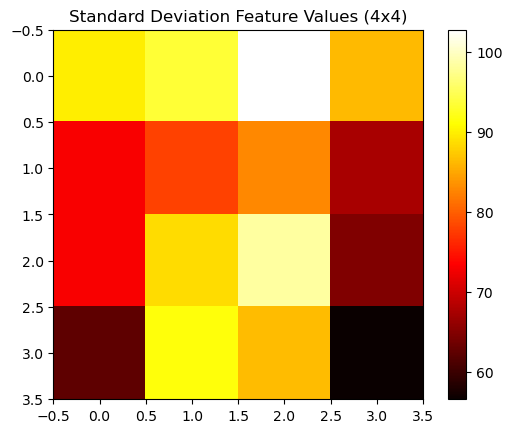

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features Z1 to Z16
features = df.loc[:, 'Z1':'Z16']

# Calculate mean and std per feature
mean_values = features.mean().values.reshape(4,4)
std_values = features.std().values.reshape(4,4)

# Visualize mean as image
plt.imshow(mean_values, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Mean Feature Values (4x4)')
plt.show()

# Visualize std deviation as image
plt.imshow(std_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Standard Deviation Feature Values (4x4)')
plt.show()


In [ ]:
\